<a href="https://colab.research.google.com/github/Antonio-Villarreal/DeepLearningModels/blob/main/CNN_MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Neural Networks

## Import the libraries

In [35]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing
Our MNIST images only have a depth of 1. We must explicitly declare that.

In [20]:
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Creating, compiling and training the model

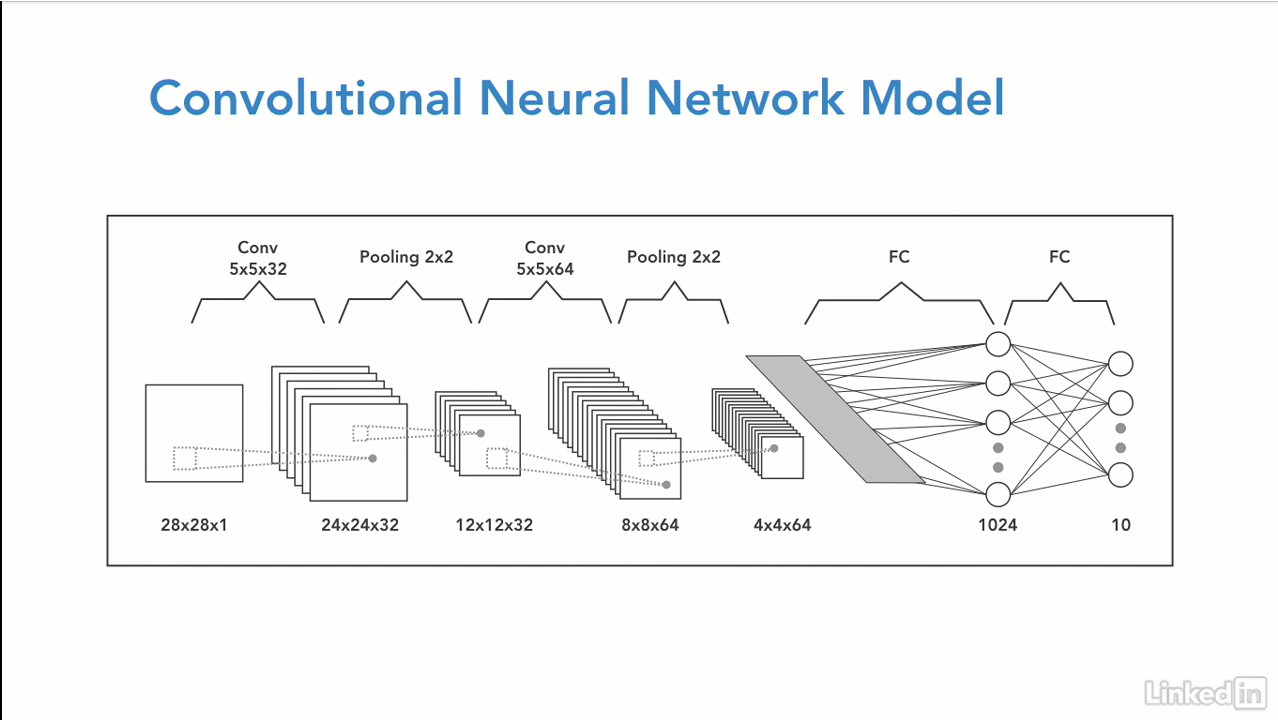

In [22]:
cnn = Sequential()

In [23]:
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))

In [24]:
cnn.add(MaxPooling2D())

In [25]:
cnn.add(Conv2D(64, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))

In [26]:
cnn.add(MaxPooling2D())

In [27]:
cnn.add(Flatten())

In [28]:
cnn.add(Dense(1024, activation='relu'))

In [29]:
cnn.add(Dense(10, activation='softmax'))

In [30]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

## Train the Model

In [ ]:
# history_cnn = cnn.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))
# DO NOT RUN THIS - IT WILL TAKE 20 MINUTES PER EPOCH

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])

In [38]:
cnn.load_weights('/content/cnn-model5.h5')

In [40]:
score = cnn.evaluate(X_test, y_test)
# Accuracy is significantly better than our Deep Neural Network Model (99%)

313/313 [==============================] - 10s 29ms/step - loss: 0.0268 - accuracy: 0.9930


## Accuracy of the model